# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

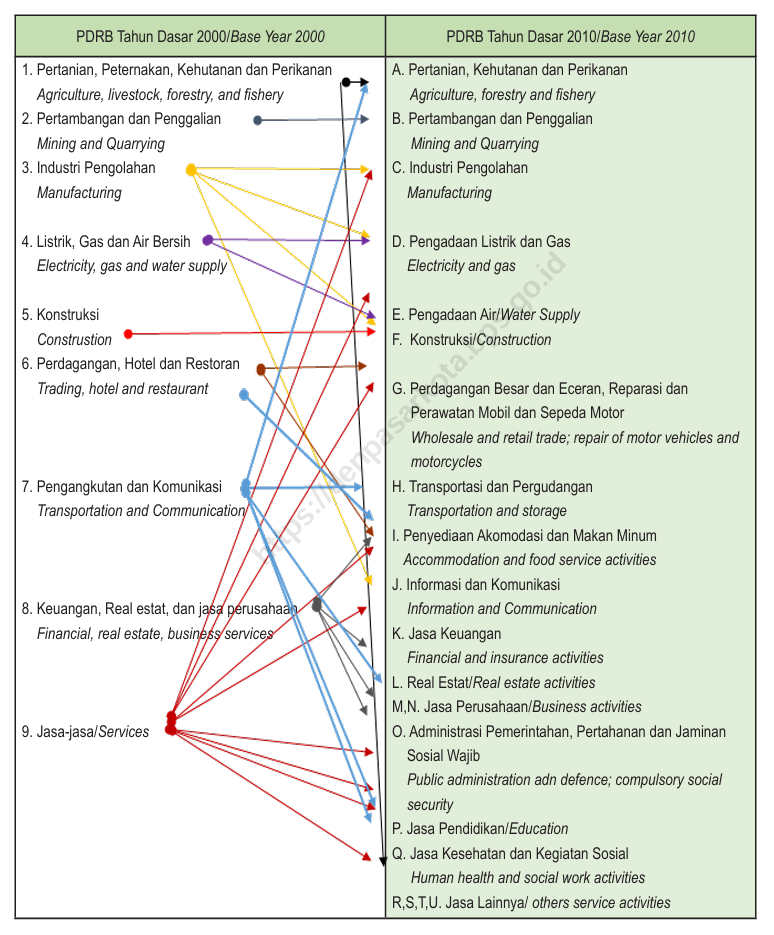

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['kerajinan','produk','umkm','rokok','industri']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [ ]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor3_triwulan4_bali.xlsx")
# berita_balipost

Unnamed: 0                                              title  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3            3  PT Pindad Siap Produksi Maung Untuk Jajaran Me...   
4            4  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
5            5  MV3 Garuda Limousine Jadi Kendaraan Kepresiden...   
6            6  Budidaya Bawang Merah Terkendala Biaya Produks...   
7            7  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
8            8  Paket Satriya Majukan UMKM dengan Bangun Pasar...   
9            9  Penghapusan Utang Hanya Bagi UMKM Tak Mampu Bayar   
10          10  Sambut Paket Satriya Warga Kampung Islam Lebah...   
11          11  Presiden Tandatangani PP Penghapusan Piutang M...   
12          12  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
13          13  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
14          14  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
15          15  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
16          16  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
17          17  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
18          18  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   
19          19  Permudah Promosi Digital, UMKM Diminta Gunakan AI   

                                                 link       date keyword  \
0   https://www.balipost.com/news/2024/11/08/42635... 2024-11-08  produk   
1   https://www.balipost.com/news/2024/11/05/42575... 2024-11-05  produk   
2   https://www.balipost.com/news/2024/10/29/42462... 2024-10-29  produk   
3   https://www.balipost.com/news/2024/10/28/42454... 2024-10-28  produk   
4   https://www.balipost.com/news/2024/10/28/42445... 2024-10-28  produk   
5   https://www.balipost.com/news/2024/10/21/42333... 2024-10-21  produk   
6   https://www.balipost.com/news/2024/10/19/42294... 2024-10-19  produk   
7   https://www.balipost.com/news/2024/10/17/42260... 2024-10-17  produk   
8   https://www.balipost.com/news/2024/11/07/42616... 2024-11-07    umkm   
9   https://www.balipost.com/news/2024/11/06/42606... 2024-11-06    umkm   
10  https://www.balipost.com/news/2024/11/06/42600... 2024-11-06    umkm   
11  https://www.balipost.com/news/2024/11/06/42590... 2024-11-06    umkm   
12  https://www.balipost.com/news/2024/11/04/42565... 2024-11-04    umkm   
13  https://www.balipost.com/news/2024/10/30/42495... 2024-10-30    umkm   
14  https://www.balipost.com/news/2024/10/24/42380... 2024-10-24    umkm   
15  https://www.balipost.com/news/2024/10/21/42341... 2024-10-21    umkm   
16  https://www.balipost.com/news/2024/10/19/42299... 2024-10-19    umkm   
17  https://www.balipost.com/news/2024/10/13/42195... 2024-10-13    umkm   
18  https://www.balipost.com/news/2024/10/04/42070... 2024-10-04    umkm   
19  https://www.balipost.com/news/2024/10/02/42049... 2024-10-02    umkm   

                                              content  
0   DENPASAR, BALIPOST.com - Badan usaha milik des...  
1   DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...  
2   DENPASAR, BALIPOST.com - Swasembada pangan men...  
3   JAKARTA, BALIPOST.com - PT Pindad sanggup memp...  
4   DENPASAR, BALIPOST.com - Kepala Badan Penyelen...  
5   DENPASAR, BALIPOST.com - PT Pindad memperkenal...  
6   MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
7   MANGUPURA, BALIPOST.com - Produk berbasis kont...  
8   SEMARAPURA, BALIPOST.com - Program unggulan ca...  
9   JAKARTA, BALIPOST.com - Kebijakan penghapusan ...  
10  SEMARAPURA, BALIPOST.com - Warga Kampung Islam...  
11  JAKARTA, BALIPOST.com - Peraturan Pemerintah (...  
12  DENPASAR, BALIPOST.com - Graha Yowana Suci (GY...  
13  DENPASAR, BALIPOST.com - Menggenjot UMKM tumbu...  
14  MANGUPURA, BALIPOST.com - Pasangan Calon Bupat...  
15  DENPASAR, BALIPOST.com - Sejumlah pengusaha Ba...  
16  D

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# Keyword to filter out
keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_balipost_2.shape)
berita_balipost_2

(16, 6)


Unnamed: 0                                              title  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
4            4  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
5            5  MV3 Garuda Limousine Jadi Kendaraan Kepresiden...   
6            6  Budidaya Bawang Merah Terkendala Biaya Produks...   
7            7  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
8            8  Paket Satriya Majukan UMKM dengan Bangun Pasar...   
10          10  Sambut Paket Satriya Warga Kampung Islam Lebah...   
12          12  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
13          13  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
14          14  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
15          15  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
16          16  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
17          17  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
18          18  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   

                                                 link       date keyword  \
0   https://www.balipost.com/news/2024/11/08/42635... 2024-11-08  produk   
1   https://www.balipost.com/news/2024/11/05/42575... 2024-11-05  produk   
2   https://www.balipost.com/news/2024/10/29/42462... 2024-10-29  produk   
4   https://www.balipost.com/news/2024/10/28/42445... 2024-10-28  produk   
5   https://www.balipost.com/news/2024/10/21/42333... 2024-10-21  produk   
6   https://www.balipost.com/news/2024/10/19/42294... 2024-10-19  produk   
7   https://www.balipost.com/news/2024/10/17/42260... 2024-10-17  produk   
8   https://www.balipost.com/news/2024/11/07/42616... 2024-11-07    umkm   
10  https://www.balipost.com/news/2024/11/06/42600... 2024-11-06    umkm   
12  https://www.balipost.com/news/2024/11/04/42565... 2024-11-04    umkm   
13  https://www.balipost.com/news/2024/10/30/42495... 2024-10-30    umkm   
14  https://www.balipost.com/news/2024/10/24/42380... 2024-10-24    umkm   
15  https://www.balipost.com/news/2024/10/21/42341... 2024-10-21    umkm   
16  https://www.balipost.com/news/2024/10/19/42299... 2024-10-19    umkm   
17  https://www.balipost.com/news/2024/10/13/42195... 2024-10-13    umkm   
18  https://www.balipost.com/news/2024/10/04/42070... 2024-10-04    umkm   

                                              content  
0   DENPASAR, BALIPOST.com - Badan usaha milik des...  
1   DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...  
2   DENPASAR, BALIPOST.com - Swasembada pangan men...  
4   DENPASAR, BALIPOST.com - Kepala Badan Penyelen...  
5   DENPASAR, BALIPOST.com - PT Pindad memperkenal...  
6   MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
7   MANGUPURA, BALIPOST.com - Produk berbasis kont...  
8   SEMARAPURA, BALIPOST.com - Program unggulan ca...  
10  SEMARAPURA, BALIPOST.com - Warga Kampung Islam...  
12  DENPASAR, BALIPOST.com - Graha Yowana Suci (GY...  
13  DENPASAR, BALIPOST.com - Menggenjot UMKM tumbu...  
14  MANGUPURA, BALIPOST.com - Pasangan Calon Bupat...  
15  DENPASAR, BALIPOST.com - Sejumlah pengusaha Ba...  
16  DENPASAR, BALIPOST.com - Toyota-Astra Motor (T...  
17  SEMARAPURA, BALIPOST.com - Program yang berdam...  
18  DENPASAR, BALIPOST.com - Galungan dan Kuningan...

In [7]:
# Build the regular expression pattern with word boundaries
pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# Show the filtered DataFrame
print(berita_balipost_3.shape)
berita_balipost_3

(14, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_32252\1069968203.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]


Unnamed: 0                                              title  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
4            4  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
7            7  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
8            8  Paket Satriya Majukan UMKM dengan Bangun Pasar...   
10          10  Sambut Paket Satriya Warga Kampung Islam Lebah...   
12          12  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
13          13  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
14          14  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
15          15  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
16          16  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
17          17  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
18          18  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   

                                                 link       date keyword  \
0   https://www.balipost.com/news/2024/11/08/42635... 2024-11-08  produk   
1   https://www.balipost.com/news/2024/11/05/42575... 2024-11-05  produk   
2   https://www.balipost.com/news/2024/10/29/42462... 2024-10-29  produk   
4   https://www.balipost.com/news/2024/10/28/42445... 2024-10-28  produk   
7   https://www.balipost.com/news/2024/10/17/42260... 2024-10-17  produk   
8   https://www.balipost.com/news/2024/11/07/42616... 2024-11-07    umkm   
10  https://www.balipost.com/news/2024/11/06/42600... 2024-11-06    umkm   
12  https://www.balipost.com/news/2024/11/04/42565... 2024-11-04    umkm   
13  https://www.balipost.com/news/2024/10/30/42495... 2024-10-30    umkm   
14  https://www.balipost.com/news/2024/10/24/42380... 2024-10-24    umkm   
15  https://www.balipost.com/news/2024/10/21/42341... 2024-10-21    umkm   
16  https://www.balipost.com/news/2024/10/19/42299... 2024-10-19    umkm   
17  https://www.balipost.com/news/2024/10/13/42195... 2024-10-13    umkm   
18  https://www.balipost.com/news/2024/10/04/42070... 2024-10-04    umkm   

                                              content  
0   DENPASAR, BALIPOST.com - Badan usaha milik des...  
1   DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...  
2   DENPASAR, BALIPOST.com - Swasembada pangan men...  
4   DENPASAR, BALIPOST.com - Kepala Badan Penyelen...  
7   MANGUPURA, BALIPOST.com - Produk berbasis kont...  
8   SEMARAPURA, BALIPOST.com - Program unggulan ca...  
10  SEMARAPURA, BALIPOST.com - Warga Kampung Islam...  
12  DENPASAR, BALIPOST.com - Graha Yowana Suci (GY...  
13  DENPASAR, BALIPOST.com - Menggenjot UMKM tumbu...  
14  MANGUPURA, BALIPOST.com - Pasangan Calon Bupat...  
15  DENPASAR, BALIPOST.com - Sejumlah pengusaha Ba...  
16  DENPASAR, BALIPOST.com - Toyota-Astra Motor (T...  
17  SEMARAPURA, BALIPOST.com - Program yang berdam...  
18  DENPASAR, BALIPOST.com - Galungan dan Kuningan...

In [8]:
# Remove Duplication
berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
print(berita_balipost_3.shape)
berita_balipost_3

(14, 6)


Unnamed: 0                                              title  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
4            4  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
7            7  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
8            8  Paket Satriya Majukan UMKM dengan Bangun Pasar...   
10          10  Sambut Paket Satriya Warga Kampung Islam Lebah...   
12          12  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
13          13  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
14          14  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
15          15  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
16          16  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
17          17  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
18          18  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   

                                                 link       date keyword  \
0   https://www.balipost.com/news/2024/11/08/42635... 2024-11-08  produk   
1   https://www.balipost.com/news/2024/11/05/42575... 2024-11-05  produk   
2   https://www.balipost.com/news/2024/10/29/42462... 2024-10-29  produk   
4   https://www.balipost.com/news/2024/10/28/42445... 2024-10-28  produk   
7   https://www.balipost.com/news/2024/10/17/42260... 2024-10-17  produk   
8   https://www.balipost.com/news/2024/11/07/42616... 2024-11-07    umkm   
10  https://www.balipost.com/news/2024/11/06/42600... 2024-11-06    umkm   
12  https://www.balipost.com/news/2024/11/04/42565... 2024-11-04    umkm   
13  https://www.balipost.com/news/2024/10/30/42495... 2024-10-30    umkm   
14  https://www.balipost.com/news/2024/10/24/42380... 2024-10-24    umkm   
15  https://www.balipost.com/news/2024/10/21/42341... 2024-10-21    umkm   
16  https://www.balipost.com/news/2024/10/19/42299... 2024-10-19    umkm   
17  https://www.balipost.com/news/2024/10/13/42195... 2024-10-13    umkm   
18  https://www.balipost.com/news/2024/10/04/42070... 2024-10-04    umkm   

                                              content  
0   DENPASAR, BALIPOST.com - Badan usaha milik des...  
1   DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...  
2   DENPASAR, BALIPOST.com - Swasembada pangan men...  
4   DENPASAR, BALIPOST.com - Kepala Badan Penyelen...  
7   MANGUPURA, BALIPOST.com - Produk berbasis kont...  
8   SEMARAPURA, BALIPOST.com - Program unggulan ca...  
10  SEMARAPURA, BALIPOST.com - Warga Kampung Islam...  
12  DENPASAR, BALIPOST.com - Graha Yowana Suci (GY...  
13  DENPASAR, BALIPOST.com - Menggenjot UMKM tumbu...  
14  MANGUPURA, BALIPOST.com - Pasangan Calon Bupat...  
15  DENPASAR, BALIPOST.com - Sejumlah pengusaha Ba...  
16  DENPASAR, BALIPOST.com - Toyota-Astra Motor (T...  
17  SEMARAPURA, BALIPOST.com - Program yang berdam...  
18  DENPASAR, BALIPOST.com - Galungan dan Kuningan...

## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: kerajinan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=kerajinan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=kerajinan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=kerajinan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci kerajinan: 11 artikel.

Memulai Scrapping dari DetikBali untuk keyword: produk
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=produk&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=produk&siteid=123&sortby=time&fromdatex

title    keyword     source  \
0    Kacamata Berbahan Papan Skateboard dari Singaraja  kerajinan  detikBali   
1           Puluhan UKM Kriya NTB Bidik Peluang Ekspor  kerajinan  detikBali   
2    Kisah Gibran: Sempat Dicap Pemulung Saat Pedul...  kerajinan  detikBali   
3    Subrata Kritik Birokrasi Pemerintah di Bangli ...  kerajinan  detikBali   
4    Satpol PP Buleleng Turunkan Ratusan Baliho Kon...  kerajinan  detikBali   
..                                                 ...        ...        ...   
98   Tim Pemenangan Klaim Rohmi-Firin Kuasai Tema D...   industri  detikBali   
99   Klaim Sukses di Debat Pertama, Iqbal-Dinda Ped...   industri  detikBali   
100  Diar Ingin Lanjutkan Mimpi Besar, Subrata Ungg...   industri  detikBali   
101  Wiranto Ungkap Maung Pindad untuk Menteri Seda...   industri  detikBali   
102  Sugawa Korry Ngotot Bandara Bali Utara Harus D...   industri  detikBali   

                                                  link  \
0    https://www.detik.com/bali/bisnis/d-7628782/ka...   
1    https://www.detik.com/bali/bisnis/d-7627867/pu...   
2    https://www.detik.com/bali/bali-bungah/d-76282...   
3    https://www.detik.com/bali/pilkada/d-7624157/s...   
4    https://www.detik.com/bali/pilkada/d-7581783/s...   
..                                                 ...   
98   https://www.detik.com/bali/pilkada/d-7627059/t...   
99   https://www.detik.com/bali/pilkada/d-7627237/k...   
100  https://www.detik.com/bali/pilkada/d-7624046/d...   
101  https://www.detik.com/bali/berita/d-7612128/wi...   
102  https://www.detik.com/bali/pilkada/d-7616407/s...   

                              date  \
0     Sabtu, 09 Nov 2024 12:04 WIB   
1     Kamis, 07 Nov 2024 23:17 WIB   
2     Jumat, 08 Nov 2024 10:33 WIB   
3    Selasa, 05 Nov 2024 20:55 WIB   
4     Kamis, 10 Okt 2024 17:08 WIB   
..                             ...   
98    Kamis, 07 Nov 2024 14:56 WIB   
99    Kamis, 07 Nov 2024 16:04 WIB   
100  Selasa, 05 Nov 2024 19:33 WIB   
101  Selasa, 29 Okt 2024 14:57 WIB   
102   Kamis, 31 Okt 2024 20:33 WIB   

                                               content  
0    Banyak musisi tanah air seperti Marcel, Sandy ...  
1    Seluruh Usaha Mikro Kecil Menengah (UMKM) NTB ...  
2    Komang Agus Aryana Gibran telah menjadi sosok ...  
3    Calon wakil bupati (cawabup) nomor urut 3, I M...  
4    Satuan Polisi Pamong Praja (Satpol PP) Kabupat...  
..                                                 ...  
98   Pasangan calon (paslon) nomor urut 1 Sitti Roh...  
99   Pasangan calon (paslon) nomor urut 3 Lalu Muha...  
100  Calon wakil bupati (cawabup) Bangli nomor urut...  
101  Penasihat Khusus Presiden Bidang Politik dan K...  
102  Calon bupati Buleleng nomor urut 1 Nyoman Suga...  

[103 rows x 6 columns]

Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(46, 6)


title    keyword     source  \
0    Kacamata Berbahan Papan Skateboard dari Singaraja  kerajinan  detikBali   
3    Subrata Kritik Birokrasi Pemerintah di Bangli ...  kerajinan  detikBali   
5      Gus Par Janji Permudah Calon PMI ke Luar Negeri  kerajinan  detikBali   
6    Momen Bule Ikut Lomba Tradisional di Nusa Peni...  kerajinan  detikBali   
7    Fotografi Pelari Jadi Tren di Denpasar, Bisa H...  kerajinan  detikBali   
8    Deretan Janji Cabup-cawabup Karangasem Saat De...  kerajinan  detikBali   
14   3 Pekan Menjabat, AHY Belum Tetapkan Struktura...     produk  detikBali   
15   Kacamata Berbahan Papan Skateboard dari Singaraja     produk  detikBali   
16   Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...     produk  detikBali   
18   Adu Gagasan Dua Paslon soal Pemberdayaan Kaum ...     produk  detikBali   
19   OJK Beberkan Bahaya Pay Later: Sulit Lamar Ker...     produk  detikBali   
20   Indeks Literasi Keuangan Indonesia Hanya 65,4 ...     produk  detikBali   
21   Kabupaten Badung Terpilih dalam Program Kabupa...     produk  detikBali   
25   Pemkab Badung Beberkan Rencana Beri Insentif P...     produk  detikBali   
26   Beragam Reaksi Tokoh Peduli Bali Terkait Kewaj...     produk  detikBali   
29   Koster Janji Naikkan Dana Desa Adat Jadi Rp 35...     produk  detikBali   
34   Pengamat Sebut Minimnya Gagasan Pariwisata Mul...     produk  detikBali   
40   Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...       umkm  detikBali   
41   Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...       umkm  detikBali   
42   Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...       umkm  detikBali   
43   Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...       umkm  detikBali   
44       Giri Putra Janji Permudah Izin UMKM di Bangli       umkm  detikBali   
47   Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...       umkm  detikBali   
54   Adu Gagasan Dua Paslon soal Pemberdayaan Kaum ...       umkm  detikBali   
57   De Gadjah Uji Coba Program Makan Gratis di Bul...       umkm  detikBali   
60   Koster-Giri Janjikan Infrastruktur Berkelanjut...       umkm  detikBali   
61   Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...      rokok  detikBali   
62   Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...      rokok  detikBali   
64   12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...      rokok  detikBali   
65   Sulit Tekan Jumlah Perokok Seusai Cukai Hasil ...      rokok  detikBali   
67     Kenaikan Harga Beras Kerek Inflasi Tahunan Bali      rokok  detikBali   
68   Canang Sari dan Daging Babi Kerek Inflasi Bali...      rokok  detikBali   
69   Inflasi Bali Lebih Tinggi dari Nasional, Penge...      rokok  detikBali   
70   Polisi Pamerkan Dua Anggota Ormas Pemukul Bart...      rokok  detikBali   
72   Heboh Anggota Ormas Ribut di Bar Bali gegara K...      rokok  detikBali   
74   Polisi Ungkap Pemicu Anggota Ormas Bikin Onar ...      rokok  detikBali   
75   Penggerebekan Spa Plus-plus Sesama Jenis-Bule ...      rokok  detikBali   
81   IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...   industri  detikBali   
84   Loker di Bali dalam Industri Kuliner, Cek Berb...   industri  detikBali   
85   Upaya Bali Menuju Swasembada Energi Setelah Be...   industri  detikBali   
87   Guru Besar Unud: Kedua Paslon Pilgub Bali Terl...   industri  detikBali   
88   Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   industri  detikBali   
95   Adu Gagasan Dua Paslon soal Pemberdayaan Kaum ...   industri  detikBali   
100  Diar Ingin Lanjutkan Mimpi Besar, Subrata Ungg...   industri  detikBali   
101  Wiranto Ungkap Maung Pindad untuk Menteri Seda...   industri  detikBali   
102  Sugawa Korry Ngotot Bandara Bali Utara Harus D...   industri  detikBali   

                                                  link  \
0    https://www.detik.com/bali/bisnis/d-7628782/ka...   
3    https://www.detik.com/bali/pilkada/d-7624157/s...   
5    https://www.detik.com/bali/pilkada/d-7609147/g...   
6    https://www.detik.com/bali/wisata/d-7585879/mo...  

In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(11, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_32252\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


title   keyword     source  \
40  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...      umkm  detikBali   
41  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...      umkm  detikBali   
42  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...      umkm  detikBali   
43  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...      umkm  detikBali   
44      Giri Putra Janji Permudah Izin UMKM di Bangli      umkm  detikBali   
47  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...      umkm  detikBali   
61  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...     rokok  detikBali   
62  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...     rokok  detikBali   
64  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...     rokok  detikBali   
81  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...  industri  detikBali   
84  Loker di Bali dalam Industri Kuliner, Cek Berb...  industri  detikBali   

                                                 link  \
40  https://www.detik.com/bali/bisnis/d-7622919/lu...   
41  https://www.detik.com/bali/pilkada/d-7616364/m...   
42  https://www.detik.com/bali/pilkada/d-7616535/s...   
43  https://www.detik.com/bali/pilkada/d-7616424/s...   
44  https://www.detik.com/bali/pilkada/d-7605091/g...   
47  https://www.detik.com/bali/pilkada/d-7625948/j...   
61  https://www.detik.com/bali/berita/d-7570919/ke...   
62  https://www.detik.com/bali/berita/d-7570409/cu...   
64  https://www.detik.com/bali/hukum-dan-kriminal/...   
81  https://www.detik.com/bali/bisnis/d-7584675/ig...   
84  https://www.detik.com/bali/berita/d-7595210/lo...   

                             date  \
40  Selasa, 05 Nov 2024 11:26 WIB   
41   Kamis, 31 Okt 2024 19:53 WIB   
42   Kamis, 31 Okt 2024 23:01 WIB   
43   Kamis, 31 Okt 2024 20:49 WIB   
44   Kamis, 24 Okt 2024 20:18 WIB   
47    Rabu, 06 Nov 2024 20:24 WIB   
61   Kamis, 03 Okt 2024 19:19 WIB   
62   Kamis, 03 Okt 2024 15:46 WIB   
64    Rabu, 16 Okt 2024 12:54 WIB   
81   Sabtu, 12 Okt 2024 15:50 WIB   
84   Sabtu, 19 Okt 2024 00:00 WIB   

                                              content  
40  Luhut Binsar Pandjaitan mewanti-wanti potensi ...  
41  Calon wakil bupati Tabanan nomor urut 1, I Nyo...  
42  Calon wakil bupati Tabanan nomor urut 2, I Nyo...  
43  Pasangan calon (paslon) bupati dan wakil bupat...  
44  Calon bupati Bangli nomor urut 3, Ida Bagus Ge...  
47  Pasangan calon (paslon) nomor urut 2 I Gusti N...  
61  Kementerian Kesehatan (Kemenkes) menjelaskan a...  
62  Kementerian Kesehatan (Kemenkes) merespons bat...  
64  Sebanyak 12 juta batang rokok produksi Indones...  
81  Kementerian Komunikasi dan Informatika (Kominf...  
84  detikBali berusaha menyediakan informasi lowon...

Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(11, 6)


title   keyword     source  \
40  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...      umkm  detikBali   
41  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...      umkm  detikBali   
42  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...      umkm  detikBali   
43  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...      umkm  detikBali   
44      Giri Putra Janji Permudah Izin UMKM di Bangli      umkm  detikBali   
47  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...      umkm  detikBali   
61  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...     rokok  detikBali   
62  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...     rokok  detikBali   
64  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...     rokok  detikBali   
81  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...  industri  detikBali   
84  Loker di Bali dalam Industri Kuliner, Cek Berb...  industri  detikBali   

                                                 link  \
40  https://www.detik.com/bali/bisnis/d-7622919/lu...   
41  https://www.detik.com/bali/pilkada/d-7616364/m...   
42  https://www.detik.com/bali/pilkada/d-7616535/s...   
43  https://www.detik.com/bali/pilkada/d-7616424/s...   
44  https://www.detik.com/bali/pilkada/d-7605091/g...   
47  https://www.detik.com/bali/pilkada/d-7625948/j...   
61  https://www.detik.com/bali/berita/d-7570919/ke...   
62  https://www.detik.com/bali/berita/d-7570409/cu...   
64  https://www.detik.com/bali/hukum-dan-kriminal/...   
81  https://www.detik.com/bali/bisnis/d-7584675/ig...   
84  https://www.detik.com/bali/berita/d-7595210/lo...   

                             date  \
40  Selasa, 05 Nov 2024 11:26 WIB   
41   Kamis, 31 Okt 2024 19:53 WIB   
42   Kamis, 31 Okt 2024 23:01 WIB   
43   Kamis, 31 Okt 2024 20:49 WIB   
44   Kamis, 24 Okt 2024 20:18 WIB   
47    Rabu, 06 Nov 2024 20:24 WIB   
61   Kamis, 03 Okt 2024 19:19 WIB   
62   Kamis, 03 Okt 2024 15:46 WIB   
64    Rabu, 16 Okt 2024 12:54 WIB   
81   Sabtu, 12 Okt 2024 15:50 WIB   
84   Sabtu, 19 Okt 2024 00:00 WIB   

                                              content  
40  Luhut Binsar Pandjaitan mewanti-wanti potensi ...  
41  Calon wakil bupati Tabanan nomor urut 1, I Nyo...  
42  Calon wakil bupati Tabanan nomor urut 2, I Nyo...  
43  Pasangan calon (paslon) bupati dan wakil bupat...  
44  Calon bupati Bangli nomor urut 3, Ida Bagus Ge...  
47  Pasangan calon (paslon) nomor urut 2 I Gusti N...  
61  Kementerian Kesehatan (Kemenkes) menjelaskan a...  
62  Kementerian Kesehatan (Kemenkes) merespons bat...  
64  Sebanyak 12 juta batang rokok produksi Indones...  
81  Kementerian Komunikasi dan Informatika (Kominf...  
84  detikBali berusaha menyediakan informasi lowon...

## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: kerajinan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=kerajinan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=kerajinan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=kerajinan&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=kerajinan&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=kerajinan&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'kerajinan': 0

Memulai scrapping RadarBali untuk keyword: produk
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=produk&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=produk&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=produk&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/s

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

title   keyword     source  \
0   Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk  RadarBali   
1   BRImo FSTVL Ajak Nasabah Rajin Transaksi dan M...    produk  RadarBali   
2   Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk  RadarBali   
3   Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk  RadarBali   
4   Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk  RadarBali   
5   Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk  RadarBali   
6   BPOM Tarik dan Musnahkan Latiao, Terbukti Seba...    produk  RadarBali   
7   Pertama di Aplikasi GoPay, Pengguna Bisa Akses...    produk  RadarBali   
8   Telkomsel Lebih Dekat dengan Gen Z melalui by....    produk  RadarBali   
9   Seraya Culture Festival 2024 : Produk Jagung B...    produk  RadarBali   
10  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk  RadarBali   
11  Lima Tips ala Tokopedia dan ShopTokopedia untu...    produk  RadarBali   
12  Petani Hortikultura Tabanan Dijamin Semringah,...    produk  RadarBali   
13  Produk Tembakau Alternatif Punya Potensi Dukun...    produk  RadarBali   
14  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk  RadarBali   
15  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk  RadarBali   
16  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...      umkm  RadarBali   
17  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm  RadarBali   
18  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...      umkm  RadarBali   
19  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm  RadarBali   
20  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm  RadarBali   
21  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...      umkm  RadarBali   
22  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm  RadarBali   
23  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm  RadarBali   
24  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm  RadarBali   
25  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm  RadarBali   
26  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm  RadarBali   
27  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm  RadarBali   
28  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm  RadarBali   
29  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm  RadarBali   
30  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm  RadarBali   
31  Sanur Village Festival Ke- 17/2024: Nikmati Ra...      umkm  RadarBali   
32  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm  RadarBali   
33  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm  RadarBali   
34  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm  RadarBali   
35  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...      umkm  RadarBali   
36  De Gadjah Janjikan Luncurkan Seribu Startup Be...      umkm  RadarBali   
37  Bangga Tonjolkan Budaya Indonesia lewat Produk...      umkm  RadarBali   
38  Dua Pemuda Nyaris Saling Bunuh, Sama-sama Bers...     rokok  RadarBali   
39  Produk Tembakau Alternatif Punya Potensi Dukun...     rokok  RadarBali   
40  Harga Rokok Terus Melonjak dan Mencekik, Pemil...     rokok  RadarBali   
41  Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...  industri  RadarBali   
42  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...  industri  RadarBali   
43  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...  industri  RadarBali   
44  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...  industri  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70531...   
1   https://radarbali.jawapos.com/ekonomi/70530630...   
2   https://radarbali.jawapos.com/pendidikan/70529...   
3   https://radarbali.jawapos.com/badung/705290463...   
4   https://radarbali.jawapos.com/politika/7052856...   
5   https://radarbali.jawapos.com/gaya-hidup/70528...   
6   https://radarbali.jawapos.com/kesehatan/705268...   
7  

In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(40, 6)


title   keyword     source  \
0   Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk  RadarBali   
1   BRImo FSTVL Ajak Nasabah Rajin Transaksi dan M...    produk  RadarBali   
2   Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk  RadarBali   
3   Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk  RadarBali   
4   Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk  RadarBali   
5   Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk  RadarBali   
6   BPOM Tarik dan Musnahkan Latiao, Terbukti Seba...    produk  RadarBali   
7   Pertama di Aplikasi GoPay, Pengguna Bisa Akses...    produk  RadarBali   
8   Telkomsel Lebih Dekat dengan Gen Z melalui by....    produk  RadarBali   
9   Seraya Culture Festival 2024 : Produk Jagung B...    produk  RadarBali   
10  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk  RadarBali   
11  Lima Tips ala Tokopedia dan ShopTokopedia untu...    produk  RadarBali   
12  Petani Hortikultura Tabanan Dijamin Semringah,...    produk  RadarBali   
13  Produk Tembakau Alternatif Punya Potensi Dukun...    produk  RadarBali   
14  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk  RadarBali   
15  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk  RadarBali   
17  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm  RadarBali   
19  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm  RadarBali   
20  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm  RadarBali   
22  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm  RadarBali   
23  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm  RadarBali   
24  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm  RadarBali   
25  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm  RadarBali   
26  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm  RadarBali   
27  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm  RadarBali   
28  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm  RadarBali   
29  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm  RadarBali   
30  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm  RadarBali   
31  Sanur Village Festival Ke- 17/2024: Nikmati Ra...      umkm  RadarBali   
32  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm  RadarBali   
33  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm  RadarBali   
34  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm  RadarBali   
35  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...      umkm  RadarBali   
36  De Gadjah Janjikan Luncurkan Seribu Startup Be...      umkm  RadarBali   
38  Dua Pemuda Nyaris Saling Bunuh, Sama-sama Bers...     rokok  RadarBali   
40  Harga Rokok Terus Melonjak dan Mencekik, Pemil...     rokok  RadarBali   
41  Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...  industri  RadarBali   
42  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...  industri  RadarBali   
43  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...  industri  RadarBali   
44  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...  industri  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70531...   
1   https://radarbali.jawapos.com/ekonomi/70530630...   
2   https://radarbali.jawapos.com/pendidikan/70529...   
3   https://radarbali.jawapos.com/badung/705290463...   
4   https://radarbali.jawapos.com/politika/7052856...   
5   https://radarbali.jawapos.com/gaya-hidup/70528...   
6   https://radarbali.jawapos.com/kesehatan/705268...   
7   https://radarbali.jawapos.com/gaya-hidup/70525...   
8   https://radarbali.jawapos.com/gaya-hidup/70523...   
9   https://radarbali.jawapos.com/berita-daerah/70...   
10  https://radarbali.jawapos.com/ekonomi/70520966...   
11  https://radarbali.jawapos.com/gaya-hidup/70520...   
12  https://radarbali.jawapos.com/politika/7051922...   
13  https://radarbali.jawapos.com/pariwisata/70519.

In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(31, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_32252\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


title   keyword     source  \
0   Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk  RadarBali   
2   Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk  RadarBali   
3   Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk  RadarBali   
4   Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk  RadarBali   
5   Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk  RadarBali   
9   Seraya Culture Festival 2024 : Produk Jagung B...    produk  RadarBali   
10  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk  RadarBali   
13  Produk Tembakau Alternatif Punya Potensi Dukun...    produk  RadarBali   
14  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk  RadarBali   
15  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk  RadarBali   
17  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm  RadarBali   
19  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm  RadarBali   
20  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm  RadarBali   
22  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm  RadarBali   
23  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm  RadarBali   
24  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm  RadarBali   
25  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm  RadarBali   
26  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm  RadarBali   
27  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm  RadarBali   
28  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm  RadarBali   
29  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm  RadarBali   
30  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm  RadarBali   
32  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm  RadarBali   
33  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm  RadarBali   
34  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm  RadarBali   
35  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...      umkm  RadarBali   
36  De Gadjah Janjikan Luncurkan Seribu Startup Be...      umkm  RadarBali   
40  Harga Rokok Terus Melonjak dan Mencekik, Pemil...     rokok  RadarBali   
42  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...  industri  RadarBali   
43  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...  industri  RadarBali   
44  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...  industri  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70531...   
2   https://radarbali.jawapos.com/pendidikan/70529...   
3   https://radarbali.jawapos.com/badung/705290463...   
4   https://radarbali.jawapos.com/politika/7052856...   
5   https://radarbali.jawapos.com/gaya-hidup/70528...   
9   https://radarbali.jawapos.com/berita-daerah/70...   
10  https://radarbali.jawapos.com/ekonomi/70520966...   
13  https://radarbali.jawapos.com/pariwisata/70519...   
14  https://radarbali.jawapos.com/hiburan-budaya/7...   
15  https://radarbali.jawapos.com/ekonomi/70514802...   
17  https://radarbali.jawapos.com/pariwisata/70529...   
19  https://radarbali.jawapos.com/bali/705288774/s...   
20  https://radarbali.jawapos.com/denpasar/7052880...   
22  https://radarbali.jawapos.com/politika/7052811...   
23  https://radarbali.jawapos.com/ekonomi/70527440...   
24  https://radarbali.jawapos.com/politika/7052684...   
25  https://radarbali.jawapos.com/buleleng/7052375...   
26  https://radarbali.jawapos.com/politika/7052319...   
27  https://radarbali.jawapos.com/politika/7052084...   
28  https://radarbali.jawapos.com/ekonomi/70520718...   
29  https://radarbali.jawapos.com/politika/7051869...   
30  https://radarbali.jawapos.com/pendidikan/70518...   
32  https://radarbali.jawapos.com/politika/7051670...   
33  https://radarbali.jawapos.com/ekonomi/70516328...   
34  https://radarbali.jawapos.com/politika/7051567...   
35  https://radarbali.jawapos.com/politika/7051530...   
36  https://

In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(30, 6)


title   keyword     source  \
0   Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk  RadarBali   
2   Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk  RadarBali   
3   Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk  RadarBali   
4   Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk  RadarBali   
5   Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk  RadarBali   
10  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk  RadarBali   
13  Produk Tembakau Alternatif Punya Potensi Dukun...    produk  RadarBali   
14  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk  RadarBali   
15  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk  RadarBali   
17  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm  RadarBali   
19  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm  RadarBali   
20  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm  RadarBali   
22  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm  RadarBali   
23  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm  RadarBali   
24  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm  RadarBali   
25  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm  RadarBali   
26  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm  RadarBali   
27  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm  RadarBali   
28  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm  RadarBali   
29  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm  RadarBali   
30  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm  RadarBali   
32  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm  RadarBali   
33  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm  RadarBali   
34  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm  RadarBali   
35  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...      umkm  RadarBali   
36  De Gadjah Janjikan Luncurkan Seribu Startup Be...      umkm  RadarBali   
40  Harga Rokok Terus Melonjak dan Mencekik, Pemil...     rokok  RadarBali   
42  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...  industri  RadarBali   
43  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...  industri  RadarBali   
44  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...  industri  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70531...   
2   https://radarbali.jawapos.com/pendidikan/70529...   
3   https://radarbali.jawapos.com/badung/705290463...   
4   https://radarbali.jawapos.com/politika/7052856...   
5   https://radarbali.jawapos.com/gaya-hidup/70528...   
10  https://radarbali.jawapos.com/ekonomi/70520966...   
13  https://radarbali.jawapos.com/pariwisata/70519...   
14  https://radarbali.jawapos.com/hiburan-budaya/7...   
15  https://radarbali.jawapos.com/ekonomi/70514802...   
17  https://radarbali.jawapos.com/pariwisata/70529...   
19  https://radarbali.jawapos.com/bali/705288774/s...   
20  https://radarbali.jawapos.com/denpasar/7052880...   
22  https://radarbali.jawapos.com/politika/7052811...   
23  https://radarbali.jawapos.com/ekonomi/70527440...   
24  https://radarbali.jawapos.com/politika/7052684...   
25  https://radarbali.jawapos.com/buleleng/7052375...   
26  https://radarbali.jawapos.com/politika/7052319...   
27  https://radarbali.jawapos.com/politika/7052084...   
28  https://radarbali.jawapos.com/ekonomi/70520718...   
29  https://radarbali.jawapos.com/politika/7051869...   
30  https://radarbali.jawapos.com/pendidikan/70518...   
32  https://radarbali.jawapos.com/politika/7051670...   
33  https://radarbali.jawapos.com/ekonomi/70516328...   
34  https://radarbali.jawapos.com/politika/7051567...   
35  https://radarbali.jawapos.com/politika/7051530...   
36  https://radarbali.jawapos.com/politika/7051512...   
40  https://radarbali.jawapos.com/hukum-kriminal/7...   
42  https://radarbali.jawapos.com

## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor3_triwulan4_bali.xlsx")

In [20]:
berita_balipost.head()

Unnamed: 0                                              title  \
0           0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1           1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2           2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3           3  PT Pindad Siap Produksi Maung Untuk Jajaran Me...   
4           4  Kewajiban Produk Bersertifikat Halal Dikeluhka...   

                                                link       date keyword  \
0  https://www.balipost.com/news/2024/11/08/42635... 2024-11-08  produk   
1  https://www.balipost.com/news/2024/11/05/42575... 2024-11-05  produk   
2  https://www.balipost.com/news/2024/10/29/42462... 2024-10-29  produk   
3  https://www.balipost.com/news/2024/10/28/42454... 2024-10-28  produk   
4  https://www.balipost.com/news/2024/10/28/42445... 2024-10-28  produk   

                                             content  
0  DENPASAR, BALIPOST.com - Badan usaha milik des...  
1  DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...  
2  DENPASAR, BALIPOST.com - Swasembada pangan men...  
3  JAKARTA, BALIPOST.com - PT Pindad sanggup memp...  
4  DENPASAR, BALIPOST.com - Kepala Badan Penyelen...

In [21]:
berita_detik.head()

title    keyword     source  \
0  Kacamata Berbahan Papan Skateboard dari Singaraja  kerajinan  detikBali   
1         Puluhan UKM Kriya NTB Bidik Peluang Ekspor  kerajinan  detikBali   
2  Kisah Gibran: Sempat Dicap Pemulung Saat Pedul...  kerajinan  detikBali   
3  Subrata Kritik Birokrasi Pemerintah di Bangli ...  kerajinan  detikBali   
4  Satpol PP Buleleng Turunkan Ratusan Baliho Kon...  kerajinan  detikBali   

                                                link  \
0  https://www.detik.com/bali/bisnis/d-7628782/ka...   
1  https://www.detik.com/bali/bisnis/d-7627867/pu...   
2  https://www.detik.com/bali/bali-bungah/d-76282...   
3  https://www.detik.com/bali/pilkada/d-7624157/s...   
4  https://www.detik.com/bali/pilkada/d-7581783/s...   

                            date  \
0   Sabtu, 09 Nov 2024 12:04 WIB   
1   Kamis, 07 Nov 2024 23:17 WIB   
2   Jumat, 08 Nov 2024 10:33 WIB   
3  Selasa, 05 Nov 2024 20:55 WIB   
4   Kamis, 10 Okt 2024 17:08 WIB   

                                             content  
0  Banyak musisi tanah air seperti Marcel, Sandy ...  
1  Seluruh Usaha Mikro Kecil Menengah (UMKM) NTB ...  
2  Komang Agus Aryana Gibran telah menjadi sosok ...  
3  Calon wakil bupati (cawabup) nomor urut 3, I M...  
4  Satuan Polisi Pamong Praja (Satpol PP) Kabupat...

In [22]:
berita_radarbali.head()

title keyword     source  \
0  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...  produk  RadarBali   
1  BRImo FSTVL Ajak Nasabah Rajin Transaksi dan M...  produk  RadarBali   
2  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...  produk  RadarBali   
3  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...  produk  RadarBali   
4  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...  produk  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/gaya-hidup/70531...   
1  https://radarbali.jawapos.com/ekonomi/70530630...   
2  https://radarbali.jawapos.com/pendidikan/70529...   
3  https://radarbali.jawapos.com/badung/705290463...   
4  https://radarbali.jawapos.com/politika/7052856...   

                                   date              content  
0   Kamis, 14 November 2024 | 14:00 WIB           Gaya Hidup  
1  Selasa, 12 November 2024 | 22:20 WIB  Ekonomi & Perbankan  
2    Sabtu, 9 November 2024 | 07:20 WIB           Pendidikan  
3    Kamis, 7 November 2024 | 19:00 WIB               Badung  
4    Kamis, 7 November 2024 | 12:52 WIB             Politika

In [23]:
raw_data_combined = pd.concat([berita_balipost, berita_detik, berita_radarbali], ignore_index=True) #Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

title  \
0    Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1    INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2    Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3    PT Pindad Siap Produksi Maung Untuk Jajaran Me...   
4    Kewajiban Produk Bersertifikat Halal Dikeluhka...   
..                                                 ...   
163  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
164  Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...   
165  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
166  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...   
167  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...   

                                                  link  \
0    https://www.balipost.com/news/2024/11/08/42635...   
1    https://www.balipost.com/news/2024/11/05/42575...   
2    https://www.balipost.com/news/2024/10/29/42462...   
3    https://www.balipost.com/news/2024/10/28/42454...   
4    https://www.balipost.com/news/2024/10/28/42445...   
..                                                 ...   
163  https://radarbali.jawapos.com/hukum-kriminal/7...   
164  https://radarbali.jawapos.com/jembrana/7053066...   
165  https://radarbali.jawapos.com/pariwisata/70525...   
166  https://radarbali.jawapos.com/jembrana/7051820...   
167  https://radarbali.jawapos.com/ekonomi/70515979...   

                                    date   keyword  \
0                    2024-11-08 00:00:00    produk   
1                    2024-11-05 00:00:00    produk   
2                    2024-10-29 00:00:00    produk   
3                    2024-10-28 00:00:00    produk   
4                    2024-10-28 00:00:00    produk   
..                                   ...       ...   
163     Rabu, 2 Oktober 2024 | 12:45 WIB     rokok   
164   Rabu, 13 November 2024 | 13:10 WIB  industri   
165  Selasa, 29 Oktober 2024 | 12:25 WIB  industri   
166   Kamis, 10 Oktober 2024 | 19:15 WIB  industri   
167    Jumat, 4 Oktober 2024 | 10:48 WIB  industri   

                                               content     source  
0    DENPASAR, BALIPOST.com - Badan usaha milik des...        NaN  
1    DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...        NaN  
2    DENPASAR, BALIPOST.com - Swasembada pangan men...        NaN  
3    JAKARTA, BALIPOST.com - PT Pindad sanggup memp...        NaN  
4    DENPASAR, BALIPOST.com - Kepala Badan Penyelen...        NaN  
..                                                 ...        ...  
163                                   Hukum & Kriminal  RadarBali  
164                                           Jembrana  RadarBali  
165                                         Pariwisata  RadarBali  
166                                           Jembrana  RadarBali  
167                                Ekonomi & Perbankan  RadarBali  

[168 rows x 6 columns]

In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor3_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
print(berita_balipost_3.shape)
berita_balipost_3.head()

(14, 6)


Unnamed: 0                                              title  \
0           0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1           1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2           2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
4           4  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
7           7  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   

                                                link       date keyword  \
0  https://www.balipost.com/news/2024/11/08/42635... 2024-11-08  produk   
1  https://www.balipost.com/news/2024/11/05/42575... 2024-11-05  produk   
2  https://www.balipost.com/news/2024/10/29/42462... 2024-10-29  produk   
4  https://www.balipost.com/news/2024/10/28/42445... 2024-10-28  produk   
7  https://www.balipost.com/news/2024/10/17/42260... 2024-10-17  produk   

                                             content  
0  DENPASAR, BALIPOST.com - Badan usaha milik des...  
1  DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...  
2  DENPASAR, BALIPOST.com - Swasembada pangan men...  
4  DENPASAR, BALIPOST.com - Kepala Badan Penyelen...  
7  MANGUPURA, BALIPOST.com - Produk berbasis kont...

In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(11, 6)


title keyword     source  \
40  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...    umkm  detikBali   
41  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...    umkm  detikBali   
42  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...    umkm  detikBali   
43  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...    umkm  detikBali   
44      Giri Putra Janji Permudah Izin UMKM di Bangli    umkm  detikBali   

                                                 link  \
40  https://www.detik.com/bali/bisnis/d-7622919/lu...   
41  https://www.detik.com/bali/pilkada/d-7616364/m...   
42  https://www.detik.com/bali/pilkada/d-7616535/s...   
43  https://www.detik.com/bali/pilkada/d-7616424/s...   
44  https://www.detik.com/bali/pilkada/d-7605091/g...   

                             date  \
40  Selasa, 05 Nov 2024 11:26 WIB   
41   Kamis, 31 Okt 2024 19:53 WIB   
42   Kamis, 31 Okt 2024 23:01 WIB   
43   Kamis, 31 Okt 2024 20:49 WIB   
44   Kamis, 24 Okt 2024 20:18 WIB   

                                              content  
40  Luhut Binsar Pandjaitan mewanti-wanti potensi ...  
41  Calon wakil bupati Tabanan nomor urut 1, I Nyo...  
42  Calon wakil bupati Tabanan nomor urut 2, I Nyo...  
43  Pasangan calon (paslon) bupati dan wakil bupat...  
44  Calon bupati Bangli nomor urut 3, Ida Bagus Ge...

In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(30, 6)


title keyword     source  \
0  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...  produk  RadarBali   
2  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...  produk  RadarBali   
3  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...  produk  RadarBali   
4  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...  produk  RadarBali   
5  Tips Outfit Kompak dengan Anabul dari Tokopedi...  produk  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/gaya-hidup/70531...   
2  https://radarbali.jawapos.com/pendidikan/70529...   
3  https://radarbali.jawapos.com/badung/705290463...   
4  https://radarbali.jawapos.com/politika/7052856...   
5  https://radarbali.jawapos.com/gaya-hidup/70528...   

                                  date     content  
0  Kamis, 14 November 2024 | 14:00 WIB  Gaya Hidup  
2   Sabtu, 9 November 2024 | 07:20 WIB  Pendidikan  
3   Kamis, 7 November 2024 | 19:00 WIB      Badung  
4   Kamis, 7 November 2024 | 12:52 WIB    Politika  
5   Kamis, 7 November 2024 | 12:50 WIB  Gaya Hidup

In [28]:
clean_data_combined = pd.concat([berita_balipost_3, berita_detik_4, berita_radarbali_4], ignore_index=True)
clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

title  \
0   Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1   INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2   Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3   Kewajiban Produk Bersertifikat Halal Dikeluhka...   
4   Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
5   Paket Satriya Majukan UMKM dengan Bangun Pasar...   
6   Sambut Paket Satriya Warga Kampung Islam Lebah...   
7   Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
8   Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
9   Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
10  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
11  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
12  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
13  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   
14  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...   
15  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...   
16  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...   
17  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...   
18      Giri Putra Janji Permudah Izin UMKM di Bangli   
19  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...   
20  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...   
21  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...   
22  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...   
23  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...   
24  Loker di Bali dalam Industri Kuliner, Cek Berb...   
25  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...   
26  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...   
27  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
28  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
29  Tips Outfit Kompak dengan Anabul dari Tokopedi...   
30  BFI Finance Buka Pembiayaan Berjaminan Propert...   
31  Produk Tembakau Alternatif Punya Potensi Dukun...   
32  Produk Filmnya Masih Terlaris Sepanjang Masa d...   
33  Bangga Tonjolkan Budaya Indonesia lewat Produk...   
34  Subak Spirit Festival (2): Suguhkan Pagelaran ...   
35  Skema Penghapusan Utang, Diskop dan UKM Bali M...   
36  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...   
37  Sambut Paket Satriya, Warga Kampung Islam Leba...   
38  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...   
39  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...   
40  Astungkara, Belasan Pelaku UMKM dan Kesenian B...   
41  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...   
42  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
43  Gelar Program Literasi Keuangan dan Asuransi, ...   
44  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...   
45  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...   
46  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
47  Batik Sasambo, UMKM Binaan Telkom yang tetap J...   
48  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...   
49  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...   
50  De Gadjah Janjikan Luncurkan Seribu Startup Be...   
51  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
52  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
53  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...   
54  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...   

                                                 link  \
0   https://www.balipost.com/news/2024/11/08/42635...   
1   https://www.balipost.com/news/2024/11/05/42575...   
2   https://www.balipost.com/news/2024/10/29/42462...   
3   https://www.balipost.com/news/2024/10/28/42445...   
4   https://www.balipost.com/news/2024/10/17/42260...   
5   https://www.balipost.com/news/2024/11/07/42616...   
6   https://www.balipost.com/news/2024/11/06/42600...   
7   https://www.balipost.com/news/2024/11/04/42565...   
8   https://www.balipost.com/news/2024/10/30/42495...   
9   https://www.balipost.com/news/2024/10/24/42380...   
10  https://www.balipost.com/news/2024/10/21/42341...   
11  https://www.balipost.com/news/2024/10/19/42299...   
12  https://www.balipost.com/news/2024/10/13/42195...   
13  https://www.balipost.com/news/2024/10/04/42070...   


In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor3_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [2]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor3_2024_triwulan4_bali.xlsx")
clean_data

Unnamed: 0                                              title  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3            3  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
4            4  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
5            5  Paket Satriya Majukan UMKM dengan Bangun Pasar...   
6            6  Sambut Paket Satriya Warga Kampung Islam Lebah...   
7            7  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
8            8  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
9            9  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
10          10  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
11          11  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
12          12  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
13          13  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   
14          14  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...   
15          15  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...   
16          16  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...   
17          17  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...   
18          18      Giri Putra Janji Permudah Izin UMKM di Bangli   
19          19  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...   
20          20  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...   
21          21  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...   
22          22  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...   
23          23  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...   
24          24  Loker di Bali dalam Industri Kuliner, Cek Berb...   
25          25  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...   
26          26  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...   
27          27  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
28          28  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
29          29  Tips Outfit Kompak dengan Anabul dari Tokopedi...   
30          30  BFI Finance Buka Pembiayaan Berjaminan Propert...   
31          31  Produk Tembakau Alternatif Punya Potensi Dukun...   
32          32  Produk Filmnya Masih Terlaris Sepanjang Masa d...   
33          33  Bangga Tonjolkan Budaya Indonesia lewat Produk...   
34          34  Subak Spirit Festival (2): Suguhkan Pagelaran ...   
35          35  Skema Penghapusan Utang, Diskop dan UKM Bali M...   
36          36  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...   
37          37  Sambut Paket Satriya, Warga Kampung Islam Leba...   
38          38  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...   
39          39  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...   
40          40  Astungkara, Belasan Pelaku UMKM dan Kesenian B...   
41          41  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...   
42          42  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
43          43  Gelar Program Literasi Keuangan dan Asuransi, ...   
44          44  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...   
45          45  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...   
46          46  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
47          47  Batik Sasambo, UMKM Binaan Telkom yang tetap J...   
48          48  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...   
49          49  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...   
50          50  De Gadjah Janjikan Luncurkan Seribu Startup Be...   
51          51  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
52          52  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
53          53  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...   
54          54  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...   

                                                 link  \
0   https://www.balipost.com/news/2024/11/08/42635...   
1   https://www.balipost.

In [3]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

Unnamed: 0                                              title   keyword  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...    produk   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...    produk   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...    produk   
3            3  Kewajiban Produk Bersertifikat Halal Dikeluhka...    produk   
4            4  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...    produk   
5            5  Paket Satriya Majukan UMKM dengan Bangun Pasar...      umkm   
6            6  Sambut Paket Satriya Warga Kampung Islam Lebah...      umkm   
7            7  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...      umkm   
8            8  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...      umkm   
9            9  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...      umkm   
10          10  Bertemu Pengusaha Badung, Suyadinata Beberkan ...      umkm   
11          11  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...      umkm   
12          12  Astaguna Atur Regulasi Batasi Minimarket, Waji...      umkm   
13          13  Galungan dan Kuningan, UMKM Digandeng Beri Sou...      umkm   
14          14  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...      umkm   
15          15  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...      umkm   
16          16  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...      umkm   
17          17  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...      umkm   
18          18      Giri Putra Janji Permudah Izin UMKM di Bangli      umkm   
19          19  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...      umkm   
20          20  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...     rokok   
21          21  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...     rokok   
22          22  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...     rokok   
23          23  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...  industri   
24          24  Loker di Bali dalam Industri Kuliner, Cek Berb...  industri   
25          25  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk   
26          26  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk   
27          27  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk   
28          28  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk   
29          29  Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk   
30          30  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk   
31          31  Produk Tembakau Alternatif Punya Potensi Dukun...    produk   
32          32  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk   
33          33  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk   
34          34  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm   
35          35  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm   
36          36  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm   
37          37  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm   
38          38  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm   
39          39  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm   
40          40  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm   
41          41  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm   
42          42  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm   
43          43  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm   
44          44  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm   
45          45  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm   
46          46  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm   
47          47  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm   
48          48  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm   
49          49  Satriya Perkuat UMKM, Sepakat Bangkitk

## Preprocessing Judul Bahasa Indonesia

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [6]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [7]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [8]:
print(clean_data_3.shape)
clean_data_3

(55, 6)


Unnamed: 0                                              title   keyword  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...    produk   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...    produk   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...    produk   
3            3  Kewajiban Produk Bersertifikat Halal Dikeluhka...    produk   
4            4  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...    produk   
5            5  Paket Satriya Majukan UMKM dengan Bangun Pasar...      umkm   
6            6  Sambut Paket Satriya Warga Kampung Islam Lebah...      umkm   
7            7  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...      umkm   
8            8  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...      umkm   
9            9  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...      umkm   
10          10  Bertemu Pengusaha Badung, Suyadinata Beberkan ...      umkm   
11          11  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...      umkm   
12          12  Astaguna Atur Regulasi Batasi Minimarket, Waji...      umkm   
13          13  Galungan dan Kuningan, UMKM Digandeng Beri Sou...      umkm   
14          14  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...      umkm   
15          15  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...      umkm   
16          16  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...      umkm   
17          17  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...      umkm   
18          18      Giri Putra Janji Permudah Izin UMKM di Bangli      umkm   
19          19  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...      umkm   
20          20  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...     rokok   
21          21  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...     rokok   
22          22  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...     rokok   
23          23  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...  industri   
24          24  Loker di Bali dalam Industri Kuliner, Cek Berb...  industri   
25          25  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk   
26          26  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk   
27          27  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk   
28          28  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk   
29          29  Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk   
30          30  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk   
31          31  Produk Tembakau Alternatif Punya Potensi Dukun...    produk   
32          32  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk   
33          33  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk   
34          34  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm   
35          35  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm   
36          36  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm   
37          37  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm   
38          38  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm   
39          39  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm   
40          40  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm   
41          41  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm   
42          42  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm   
43          43  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm   
44          44  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm   
45          45  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm   
46          46  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm   
47          47  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm   
48          48  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm   
49          49  Satriya Perkuat UMKM, Sepakat Bangkitk

## Translate Judul ke Bahasa Inggris dan Preprocessing

In [9]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [10]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [11]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(55, 7)


Unnamed: 0                                              title   keyword  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...    produk   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...    produk   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...    produk   
3            3  Kewajiban Produk Bersertifikat Halal Dikeluhka...    produk   
4            4  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...    produk   
5            5  Paket Satriya Majukan UMKM dengan Bangun Pasar...      umkm   
6            6  Sambut Paket Satriya Warga Kampung Islam Lebah...      umkm   
7            7  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...      umkm   
8            8  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...      umkm   
9            9  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...      umkm   
10          10  Bertemu Pengusaha Badung, Suyadinata Beberkan ...      umkm   
11          11  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...      umkm   
12          12  Astaguna Atur Regulasi Batasi Minimarket, Waji...      umkm   
13          13  Galungan dan Kuningan, UMKM Digandeng Beri Sou...      umkm   
14          14  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...      umkm   
15          15  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...      umkm   
16          16  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...      umkm   
17          17  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...      umkm   
18          18      Giri Putra Janji Permudah Izin UMKM di Bangli      umkm   
19          19  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...      umkm   
20          20  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...     rokok   
21          21  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...     rokok   
22          22  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...     rokok   
23          23  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...  industri   
24          24  Loker di Bali dalam Industri Kuliner, Cek Berb...  industri   
25          25  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk   
26          26  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk   
27          27  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk   
28          28  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk   
29          29  Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk   
30          30  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk   
31          31  Produk Tembakau Alternatif Punya Potensi Dukun...    produk   
32          32  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk   
33          33  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk   
34          34  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm   
35          35  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm   
36          36  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm   
37          37  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm   
38          38  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm   
39          39  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm   
40          40  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm   
41          41  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm   
42          42  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm   
43          43  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm   
44          44  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm   
45          45  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm   
46          46  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm   
47          47  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm   
48          48  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm   
49          49  Satriya Perkuat UMKM, Sepakat Bangkitk

In [12]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(55, 8)


Unnamed: 0                                              title   keyword  \
0            0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...    produk   
1            1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...    produk   
2            2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...    produk   
3            3  Kewajiban Produk Bersertifikat Halal Dikeluhka...    produk   
4            4  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...    produk   
5            5  Paket Satriya Majukan UMKM dengan Bangun Pasar...      umkm   
6            6  Sambut Paket Satriya Warga Kampung Islam Lebah...      umkm   
7            7  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...      umkm   
8            8  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...      umkm   
9            9  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...      umkm   
10          10  Bertemu Pengusaha Badung, Suyadinata Beberkan ...      umkm   
11          11  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...      umkm   
12          12  Astaguna Atur Regulasi Batasi Minimarket, Waji...      umkm   
13          13  Galungan dan Kuningan, UMKM Digandeng Beri Sou...      umkm   
14          14  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...      umkm   
15          15  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...      umkm   
16          16  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...      umkm   
17          17  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...      umkm   
18          18      Giri Putra Janji Permudah Izin UMKM di Bangli      umkm   
19          19  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...      umkm   
20          20  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...     rokok   
21          21  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...     rokok   
22          22  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...     rokok   
23          23  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...  industri   
24          24  Loker di Bali dalam Industri Kuliner, Cek Berb...  industri   
25          25  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...    produk   
26          26  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...    produk   
27          27  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...    produk   
28          28  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...    produk   
29          29  Tips Outfit Kompak dengan Anabul dari Tokopedi...    produk   
30          30  BFI Finance Buka Pembiayaan Berjaminan Propert...    produk   
31          31  Produk Tembakau Alternatif Punya Potensi Dukun...    produk   
32          32  Produk Filmnya Masih Terlaris Sepanjang Masa d...    produk   
33          33  Bangga Tonjolkan Budaya Indonesia lewat Produk...    produk   
34          34  Subak Spirit Festival (2): Suguhkan Pagelaran ...      umkm   
35          35  Skema Penghapusan Utang, Diskop dan UKM Bali M...      umkm   
36          36  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...      umkm   
37          37  Sambut Paket Satriya, Warga Kampung Islam Leba...      umkm   
38          38  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...      umkm   
39          39  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...      umkm   
40          40  Astungkara, Belasan Pelaku UMKM dan Kesenian B...      umkm   
41          41  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...      umkm   
42          42  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      umkm   
43          43  Gelar Program Literasi Keuangan dan Asuransi, ...      umkm   
44          44  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...      umkm   
45          45  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...      umkm   
46          46  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...      umkm   
47          47  Batik Sasambo, UMKM Binaan Telkom yang tetap J...      umkm   
48          48  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...      umkm   
49          49  Satriya Perkuat UMKM, Sepakat Bangkitk

## Sentimen Decision + Word Cloud + Export Result

In [14]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title keyword  \
0           0  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...  produk   
1           1  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...  produk   
2           2  Untuk Capai Swasembada Pangan, Bali Perlu Perd...  produk   
3           3  Kewajiban Produk Bersertifikat Halal Dikeluhka...  produk   
4           4  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...  produk   

                                             content  \
0  DENPASAR, BALIPOST.com - Badan usaha milik des...   
1  DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...   
2  DENPASAR, BALIPOST.com - Swasembada pangan men...   
3  DENPASAR, BALIPOST.com - Kepala Badan Penyelen...   
4  MANGUPURA, BALIPOST.com - Produk berbasis kont...   

                                       cleaned_title  \
0  tingkat ekonomi masyarakat bal nusra bumdes ga...   
1  instiki unjuk kreativitas di kmi expo produk w...   
2  untuk capai swasembada pangan bal perlu perda ...   
3  wajib produk sertifikat halal keluh laku pariw...   
4  milik hak ki potensi nilai tambah produk sifat...   

                                           input_ids  \
0  [3, 2842, 2498, 1956, 2513, 4195, 1780, 5796, ...   
1  [3, 23292, 6073, 6908, 11847, 1485, 3365, 939,...   
2  [3, 1559, 22639, 30203, 6412, 2513, 2506, 1372...   
3  [3, 5273, 2392, 10985, 10292, 21593, 9003, 739...   
4  [3, 3139, 2296, 3177, 4658, 2692, 5937, 2392, ...   

                                    title_translated  \
0  Improve the economy of the Bali Nusra communit...   
1  Institute of Creativity at KMI Expo 2024!Stude...   
2  To achieve food self -sufficiency, Bali needs ...   
3  Halal certified product obligations complained...   
4  Have ki rights, the potential added value of t...   

                            cleaned_title_translated  
0  improve the economy of the bali nusra communit...  
1  institute of creativity at kmi expo 2024studen...  
2  to achieve food self sufficiency bali need loc...  
3  halal certify product obligation complain of b...  
4  have ki right the potential add value of the p...

### 1. TextBlob

#### Sentiment

In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0     produk  Improve the economy of the Bali Nusra communit...   
1     produk  Institute of Creativity at KMI Expo 2024!Stude...   
2     produk  To achieve food self -sufficiency, Bali needs ...   
3     produk  Halal certified product obligations complained...   
4     produk  Have ki rights, the potential added value of t...   
5       umkm  Satriya Package Advances MSMEs by Building Mar...   
6       umkm  Welcome the Satriya Package, a resident of Kam...   
7       umkm  Increase a visit to GYS, Culinary MSMEs are en...   
8       umkm  MSME growth boosts, banking in Bali is targete...   
9       umkm  Paslon Adicipta Commitment to Support Local MS...   
10      umkm  Meet Badung businessmen, Suyadinata revealed a...   
11      umkm  Answer the needs of MSME actors, Hilux Rangga ...   
12      umkm  Astaguna Set Regulations Limit Minimarkets, Ma...   
13      umkm  Galungan and Kuningan, MSMEs are coupled with ...   
14      umkm  Luhut Wanti-Wanti Abuse of MSME permits Foreig...   
15      umkm  Mulyadi-Ardika moves MSMEs from the agricultur...   
16      umkm  Singap Confides issued by the Tabanan Ggegara ...   
17      umkm  Sanjaya-Dirga Commitment to MSME and Ekraf in ...   
18      umkm           Giri Putra Promise MSME Permit in Bangli   
19      umkm  JAYA-WIBAWAN promises unsecured loans for MSME...   
20     rokok  The Ministry of Health Explain the rules of ci...   
21     rokok  Cigarette excise tax canceled, the Ministry of...   
22     rokok  12 million illegal cigarettes destroyed, the m...   
23  industri  IGDX 2024 created 1,600 business meetings betw...   
24  industri  Lockers in Bali in the culinary industry, chec...   
25    produk  Strengthen the strategy of local brands and MS...   
26    produk  Increase the capabilities of the community in ...   
27    produk  PJ.Surya Suramba Regional Secretary accompanie...   
28    produk  Satriya Ready to Build 10 Village Markets and ...   
29    produk  Compact Outfit Tips with Children from Tokoped...   
30    produk  BFI Finance Opens Property Meeting Financing i...   
31    produk  Alternative tobacco products have the potentia...   
32    produk  The film product is still best -selling of all...   
33    produk  Proud to highlight Indonesian culture through ...   
34      umkm  Subak Spirit Festival (2): Serve traditional a...   
35      umkm  The Bali Discope, Discope and UKM Elimination ...   
36      umkm  AMBARA-ADI proposes free parking for MSMEs, Ja...   
37      umkm  Welcome the Satriya Package, a resident of the...   
38      umkm  Goto Supports Denpasar City Government Develop...   
39      umkm  From the Tabanan Pilkada Debate: Mulyadi-Singa...   
40      umkm  Astungkara, dozens of MSMEs and Buleleng arts ...   
41      umkm  Welcomed by hundreds of Mengwi Village communi...   
42      umkm  Supporting Bali Farmers and MSMEs, Abdi Denpas...   
43      umkm  The title of financial and insurance literacy ...   
44      umkm  Mulyadi-Singap Package Ready to Build Banjar M...   
45      umkm  ITDC Cooperated Poltekpar Bali, Improve MSME C...   
46      umkm  When Paslon Adicipta visited the People's Mark...   
47      umkm  Sasambo batik, UMKM fostered by Telkom who rem...   
48      umkm  Satriya admires the creativity of Sekaa Truna ...   
49      umkm  Satriya Strengthens MSMEs, agreed to revive th...   
50      umkm  De Gadjah promised to launch a thousand touris...   
51     rokok  The price of cigarettes continues to surge and...   
52  industri  The Sanur Introducing Sanur Health to the Aust...   
53  industri  Have a plus, in Jembrana PLTS began to be glim...   
54  industri  BPDPKS Holds Sawit Research Week, Encourage th...   

                             cleaned_title_translated  
0   improve the economy of the bali nusra communit...  
1   institute of creativity at kmi expo 2024studen...  
2   to achieve food self sufficiency bali need loc...  
3   halal certify product ob

In [17]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_27268\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_27268\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [18]:
data_sentiment1

keyword                                   title_translated  \
0     produk  Improve the economy of the Bali Nusra communit...   
1     produk  Institute of Creativity at KMI Expo 2024!Stude...   
2     produk  To achieve food self -sufficiency, Bali needs ...   
3     produk  Halal certified product obligations complained...   
4     produk  Have ki rights, the potential added value of t...   
5       umkm  Satriya Package Advances MSMEs by Building Mar...   
6       umkm  Welcome the Satriya Package, a resident of Kam...   
7       umkm  Increase a visit to GYS, Culinary MSMEs are en...   
8       umkm  MSME growth boosts, banking in Bali is targete...   
9       umkm  Paslon Adicipta Commitment to Support Local MS...   
10      umkm  Meet Badung businessmen, Suyadinata revealed a...   
11      umkm  Answer the needs of MSME actors, Hilux Rangga ...   
12      umkm  Astaguna Set Regulations Limit Minimarkets, Ma...   
13      umkm  Galungan and Kuningan, MSMEs are coupled with ...   
14      umkm  Luhut Wanti-Wanti Abuse of MSME permits Foreig...   
15      umkm  Mulyadi-Ardika moves MSMEs from the agricultur...   
16      umkm  Singap Confides issued by the Tabanan Ggegara ...   
17      umkm  Sanjaya-Dirga Commitment to MSME and Ekraf in ...   
18      umkm           Giri Putra Promise MSME Permit in Bangli   
19      umkm  JAYA-WIBAWAN promises unsecured loans for MSME...   
20     rokok  The Ministry of Health Explain the rules of ci...   
21     rokok  Cigarette excise tax canceled, the Ministry of...   
22     rokok  12 million illegal cigarettes destroyed, the m...   
23  industri  IGDX 2024 created 1,600 business meetings betw...   
24  industri  Lockers in Bali in the culinary industry, chec...   
25    produk  Strengthen the strategy of local brands and MS...   
26    produk  Increase the capabilities of the community in ...   
27    produk  PJ.Surya Suramba Regional Secretary accompanie...   
28    produk  Satriya Ready to Build 10 Village Markets and ...   
29    produk  Compact Outfit Tips with Children from Tokoped...   
30    produk  BFI Finance Opens Property Meeting Financing i...   
31    produk  Alternative tobacco products have the potentia...   
32    produk  The film product is still best -selling of all...   
33    produk  Proud to highlight Indonesian culture through ...   
34      umkm  Subak Spirit Festival (2): Serve traditional a...   
35      umkm  The Bali Discope, Discope and UKM Elimination ...   
36      umkm  AMBARA-ADI proposes free parking for MSMEs, Ja...   
37      umkm  Welcome the Satriya Package, a resident of the...   
38      umkm  Goto Supports Denpasar City Government Develop...   
39      umkm  From the Tabanan Pilkada Debate: Mulyadi-Singa...   
40      umkm  Astungkara, dozens of MSMEs and Buleleng arts ...   
41      umkm  Welcomed by hundreds of Mengwi Village communi...   
42      umkm  Supporting Bali Farmers and MSMEs, Abdi Denpas...   
43      umkm  The title of financial and insurance literacy ...   
44      umkm  Mulyadi-Singap Package Ready to Build Banjar M...   
45      umkm  ITDC Cooperated Poltekpar Bali, Improve MSME C...   
46      umkm  When Paslon Adicipta visited the People's Mark...   
47      umkm  Sasambo batik, UMKM fostered by Telkom who rem...   
48      umkm  Satriya admires the creativity of Sekaa Truna ...   
49      umkm  Satriya Strengthens MSMEs, agreed to revive th...   
50      umkm  De Gadjah promised to launch a thousand touris...   
51     rokok  The price of cigarettes continues to surge and...   
52  industri  The Sanur Introducing Sanur Health to the Aust...   
53  industri  Have a plus, in Jembrana PLTS began to be glim...   
54  industri  BPDPKS Holds Sawit Research Week, Encourage th...   

                             cleaned_title_translated  \
0   improve the economy of the bali nusra communit...   
1   institute of creativity at kmi expo 2024studen...   
2   to achieve food self sufficiency bali need loc...   
3   halal certify produc

In [19]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     36
Positif    16
Negatif     3
Name: count, dtype: int64

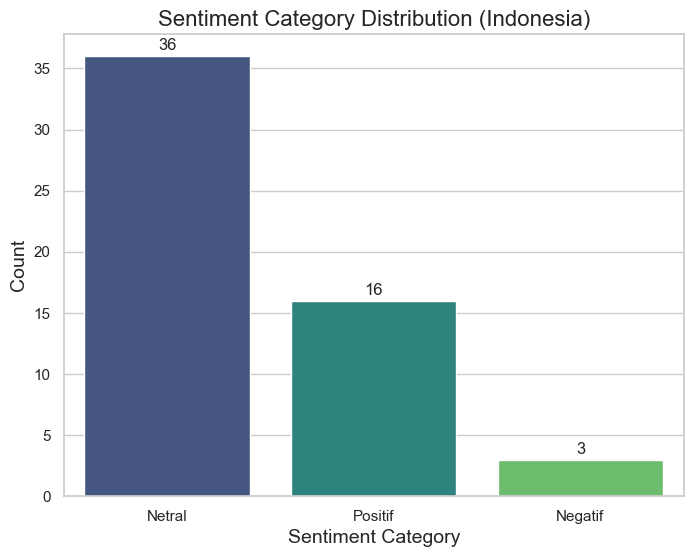

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


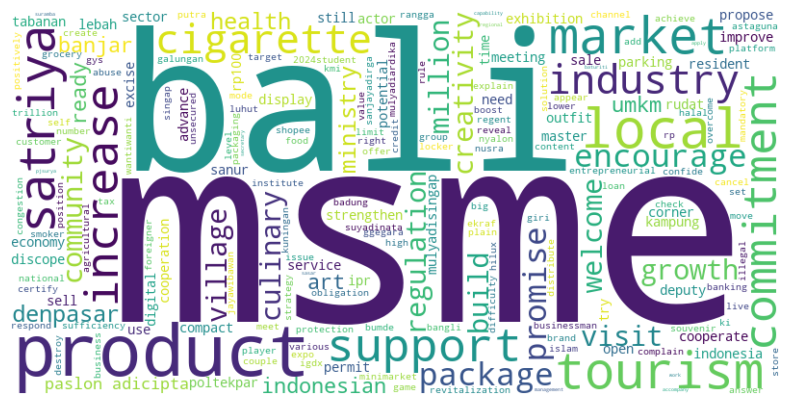

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

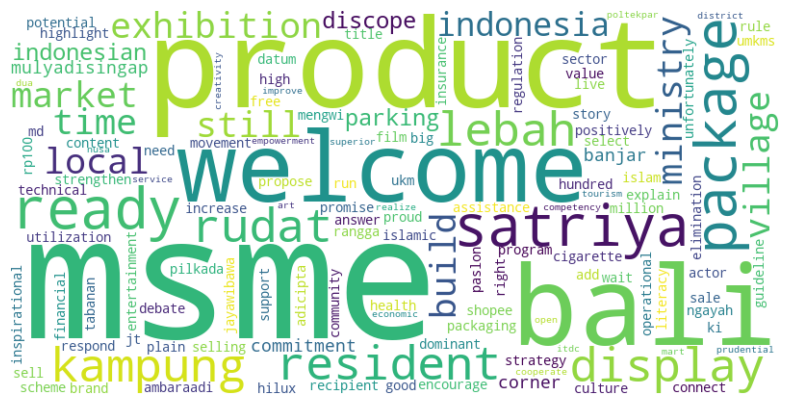

In [23]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

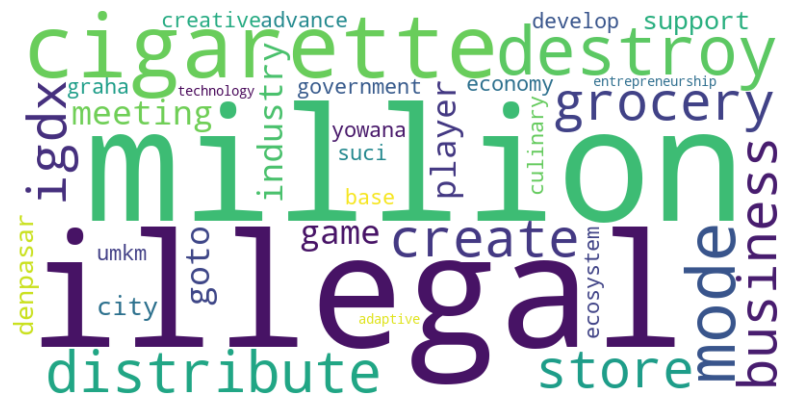

In [24]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

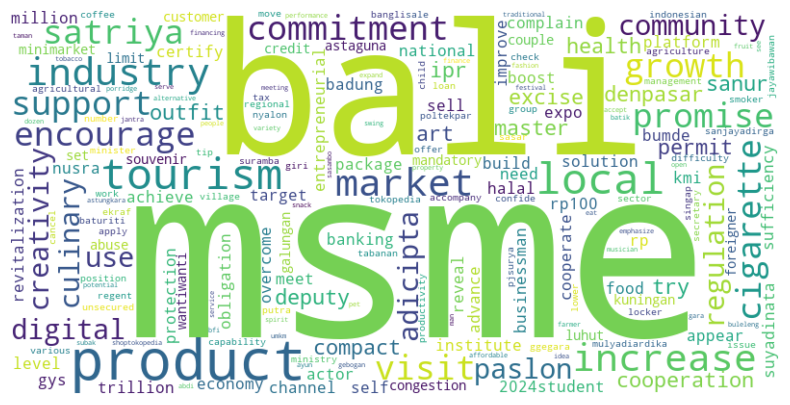

In [25]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_32252\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_32252\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

keyword                                   title_translated  \
0  produk  Improve the economy of the Bali Nusra communit...   
1  produk  Institute of Creativity at KMI Expo 2024!Stude...   
2  produk  To achieve food self -sufficiency, Bali needs ...   
3  produk  Halal certified product obligations complained...   
4  produk  Have ki rights, the potential added value of t...   

                            cleaned_title_translated  sentiment_score_english  \
0  improve the economy of the bali nusra communit...                 0.000000   
1  institute of creativity at kmi expo 2024studen...                 0.000000   
2  to achieve food self sufficiency bali need loc...                 0.000000   
3  halal certify product obligation complain of b...                 0.000000   
4  have ki right the potential add value of the p...                 0.148571   

  sentiment_category_english  sentiment_score_english_vader  \
0                     Netral                         0.4404   
1                     Netral                         0.3818   
2                     Netral                         0.0000   
3                     Netral                        -0.3612   
4                    Positif                         0.3400   

  sentiment_category_english_vader  
0                          Positif  
1                          Positif  
2                           Netral  
3                          Negatif  
4                          Positif

In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Positif    37
Netral     11
Negatif     7
Name: count, dtype: int64

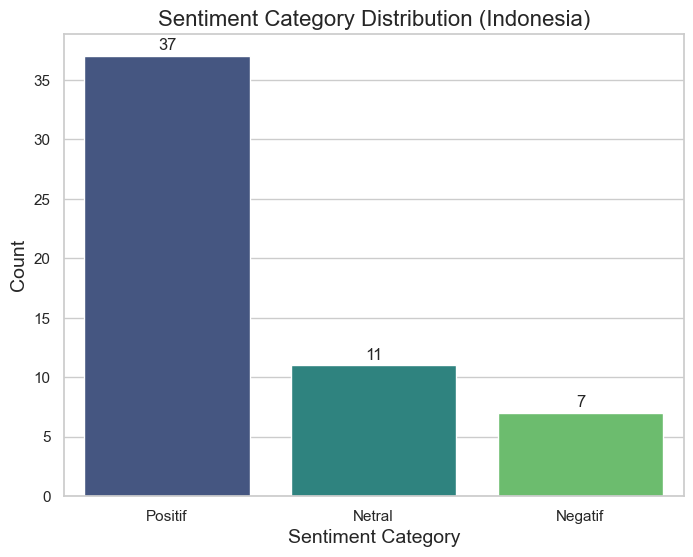

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

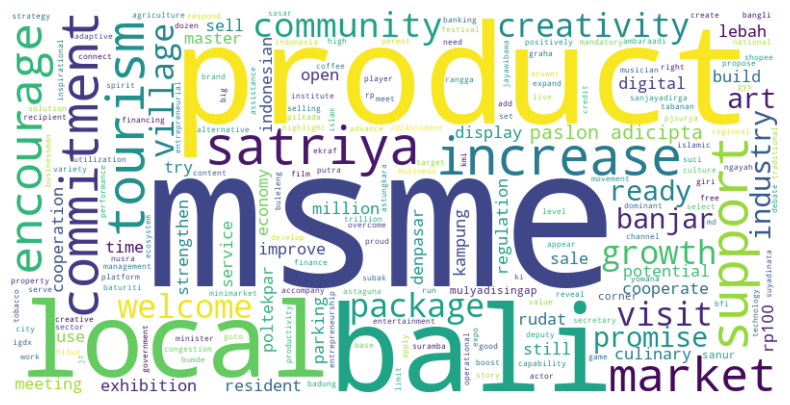

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

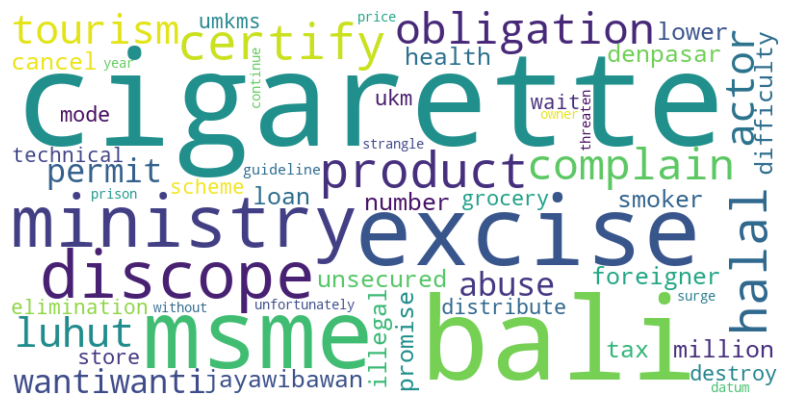

In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

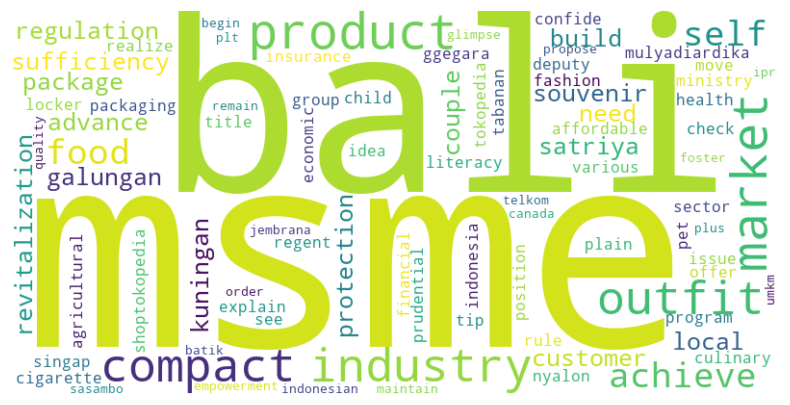

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0     produk  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1     produk  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2     produk  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3     produk  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
4     produk  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
5       umkm  Paket Satriya Majukan UMKM dengan Bangun Pasar...   
6       umkm  Sambut Paket Satriya Warga Kampung Islam Lebah...   
7       umkm  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
8       umkm  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
9       umkm  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
10      umkm  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
11      umkm  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
12      umkm  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
13      umkm  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   
14      umkm  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...   
15      umkm  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...   
16      umkm  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...   
17      umkm  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...   
18      umkm      Giri Putra Janji Permudah Izin UMKM di Bangli   
19      umkm  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...   
20     rokok  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...   
21     rokok  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...   
22     rokok  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...   
23  industri  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...   
24  industri  Loker di Bali dalam Industri Kuliner, Cek Berb...   
25    produk  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...   
26    produk  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...   
27    produk  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
28    produk  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
29    produk  Tips Outfit Kompak dengan Anabul dari Tokopedi...   
30    produk  BFI Finance Buka Pembiayaan Berjaminan Propert...   
31    produk  Produk Tembakau Alternatif Punya Potensi Dukun...   
32    produk  Produk Filmnya Masih Terlaris Sepanjang Masa d...   
33    produk  Bangga Tonjolkan Budaya Indonesia lewat Produk...   
34      umkm  Subak Spirit Festival (2): Suguhkan Pagelaran ...   
35      umkm  Skema Penghapusan Utang, Diskop dan UKM Bali M...   
36      umkm  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...   
37      umkm  Sambut Paket Satriya, Warga Kampung Islam Leba...   
38      umkm  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...   
39      umkm  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...   
40      umkm  Astungkara, Belasan Pelaku UMKM dan Kesenian B...   
41      umkm  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...   
42      umkm  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
43      umkm  Gelar Program Literasi Keuangan dan Asuransi, ...   
44      umkm  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...   
45      umkm  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...   
46      umkm  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
47      umkm  Batik Sasambo, UMKM Binaan Telkom yang tetap J...   
48      umkm  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...   
49      umkm  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...   
50      umkm  De Gadjah Janjikan Luncurkan Seribu Startup Be...   
51     rokok  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
52  industri  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
53  industri  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...   
54  industri  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...   

                                        cleaned_title  \
0   tingkat ekonomi masyarakat bal nusra bumdes ga...   
1   instiki unjuk kreativitas di kmi expo produk w...   
2   untuk capai swasembada pangan bal perlu perda ...   
3   wajib produk sertifi

In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_32252\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_32252\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0     produk  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1     produk  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2     produk  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3     produk  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
4     produk  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   
5       umkm  Paket Satriya Majukan UMKM dengan Bangun Pasar...   
6       umkm  Sambut Paket Satriya Warga Kampung Islam Lebah...   
7       umkm  Tingkatkan Kunjungan ke GYS, UMKM Kuliner Dido...   
8       umkm  Genjot Pertumbuhan UMKM, Perbankan di Bali Dit...   
9       umkm  Paslon Adicipta Komitmen Dukung UMKM Lokal hin...   
10      umkm  Bertemu Pengusaha Badung, Suyadinata Beberkan ...   
11      umkm  Jawab Kebutuhan Pelaku UMKM, Hilux Rangga Dire...   
12      umkm  Astaguna Atur Regulasi Batasi Minimarket, Waji...   
13      umkm  Galungan dan Kuningan, UMKM Digandeng Beri Sou...   
14      umkm  Luhut Wanti-wanti Penyalahgunaan Izin UMKM War...   
15      umkm  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...   
16      umkm  Sengap Curhat Dikeluarkan Grup UMKM Tabanan ge...   
17      umkm  Sanjaya-Dirga Komitmen Jaga UMKM dan Ekraf di ...   
18      umkm      Giri Putra Janji Permudah Izin UMKM di Bangli   
19      umkm  Jaya-Wibawa Janjikan Kredit Tanpa Agunan untuk...   
20     rokok  Kemenkes Jelaskan Aturan Kemasan Rokok, Bukan ...   
21     rokok  Cukai Rokok Batal Naik, Kemenkes Kesulitan Tur...   
22     rokok  12 Juta Rokok Ilegal Dimusnahkan, Modus Didist...   
23  industri  IGDX 2024 Ciptakan 1.600 Pertemuan Bisnis Anta...   
24  industri  Loker di Bali dalam Industri Kuliner, Cek Berb...   
25    produk  Perkuat Strategi Brand Lokal dan UMKM, 11.11 B...   
26    produk  Tingkatkan Kapabilitas Masyarakat Dalam Pengel...   
27    produk  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
28    produk  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
29    produk  Tips Outfit Kompak dengan Anabul dari Tokopedi...   
30    produk  BFI Finance Buka Pembiayaan Berjaminan Propert...   
31    produk  Produk Tembakau Alternatif Punya Potensi Dukun...   
32    produk  Produk Filmnya Masih Terlaris Sepanjang Masa d...   
33    produk  Bangga Tonjolkan Budaya Indonesia lewat Produk...   
34      umkm  Subak Spirit Festival (2): Suguhkan Pagelaran ...   
35      umkm  Skema Penghapusan Utang, Diskop dan UKM Bali M...   
36      umkm  Ambara-Adi Usulkan Parkir Gratis untuk UMKM, J...   
37      umkm  Sambut Paket Satriya, Warga Kampung Islam Leba...   
38      umkm  GoTo Dukung Pemkot Denpasar Kembangkan Ekosist...   
39      umkm  Dari Debat Pilkada Tabanan:  Mulyadi-Sengap Si...   
40      umkm  Astungkara, Belasan Pelaku UMKM dan Kesenian B...   
41      umkm  Disambut Ratusan Masyarakat Desa Mengwi, Paslo...   
42      umkm  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
43      umkm  Gelar Program Literasi Keuangan dan Asuransi, ...   
44      umkm  Paket Mulyadi-Sengap Siap Bangun Banjar Mart d...   
45      umkm  ITDC Gandeng Poltekpar Bali, Tingkatkan Kompet...   
46      umkm  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
47      umkm  Batik Sasambo, UMKM Binaan Telkom yang tetap J...   
48      umkm  Satriya Kagumi Kreativitas Sekaa Truna Banjar ...   
49      umkm  Satriya Perkuat UMKM, Sepakat Bangkitkan Kejay...   
50      umkm  De Gadjah Janjikan Luncurkan Seribu Startup Be...   
51     rokok  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
52  industri  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
53  industri  Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...   
54  industri  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...   

                                        cleaned_title  \
0   tingkat ekonomi masyarakat bal nusra bumdes ga...   
1   instiki unjuk kreativitas di kmi expo produk w...   
2   untuk capai swasembada pangan bal perlu perda ...   
3   wajib produk sertifi

In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     49
positif     4
negatif     2
Name: count, dtype: int64

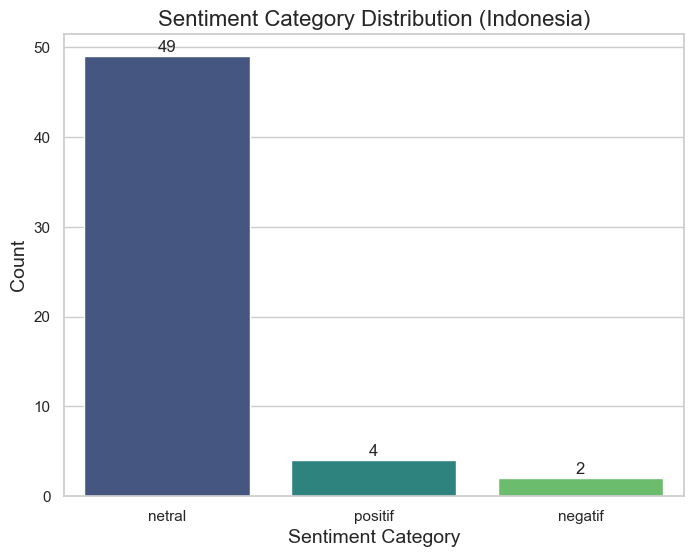

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

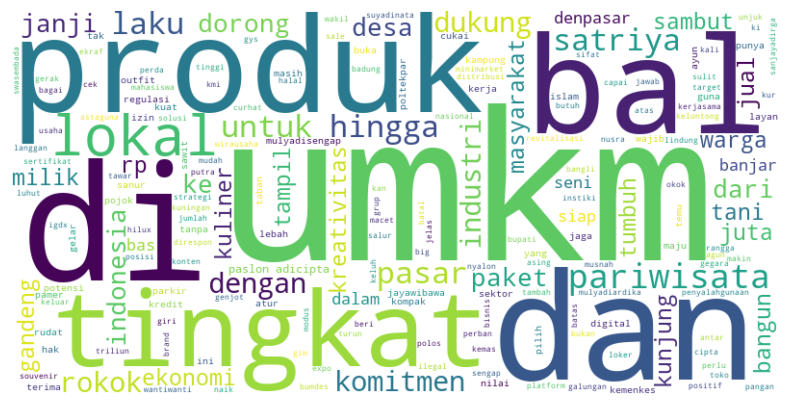

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

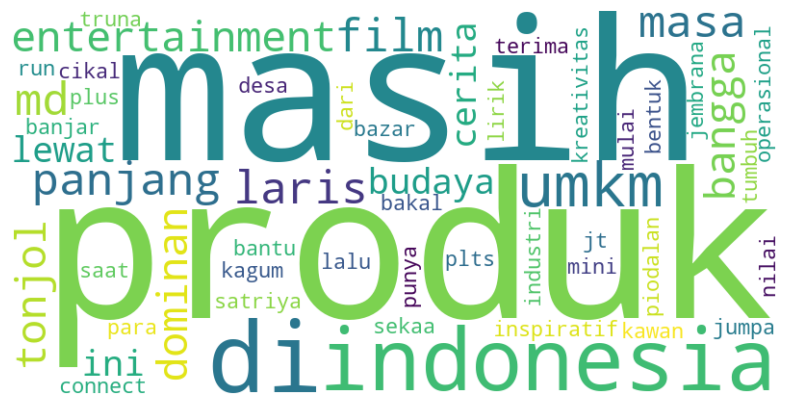

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

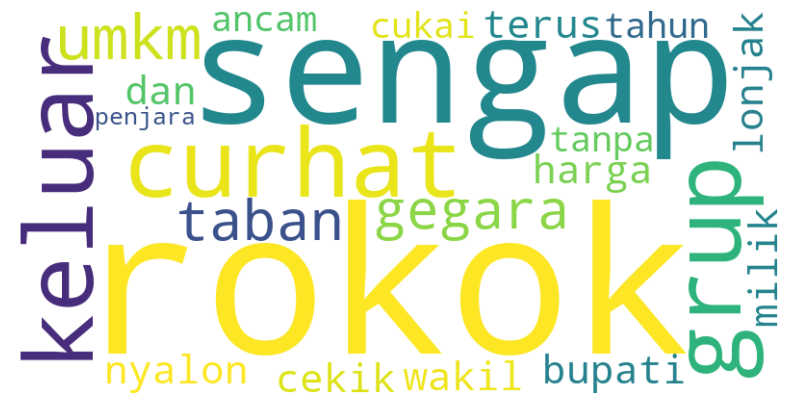

In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

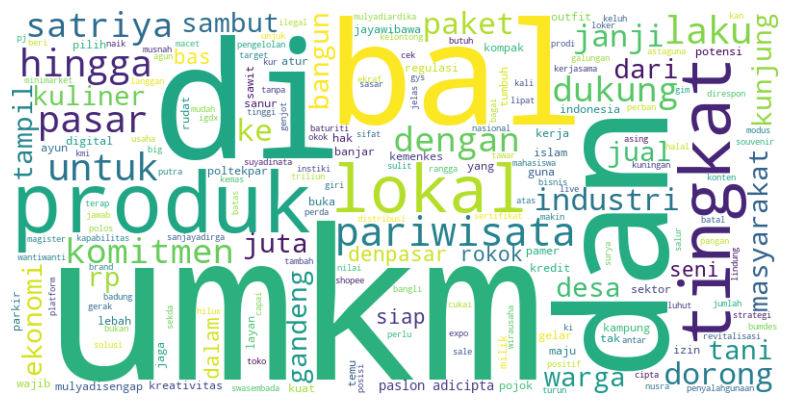

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(55, 7)


keyword                                   title_translated  \
0  produk  Improve the economy of the Bali Nusra communit...   
1  produk  Institute of Creativity at KMI Expo 2024!Stude...   
2  produk  To achieve food self -sufficiency, Bali needs ...   
3  produk  Halal certified product obligations complained...   
4  produk  Have ki rights, the potential added value of t...   

                            cleaned_title_translated  sentiment_score_english  \
0  improve the economy of the bali nusra communit...                 0.000000   
1  institute of creativity at kmi expo 2024studen...                 0.000000   
2  to achieve food self sufficiency bali need loc...                 0.000000   
3  halal certify product obligation complain of b...                 0.000000   
4  have ki right the potential add value of the p...                 0.148571   

  sentiment_category_english  sentiment_score_english_vader  \
0                     Netral                         0.4404   
1                     Netral                         0.3818   
2                     Netral                         0.0000   
3                     Netral                        -0.3612   
4                    Positif                         0.3400   

  sentiment_category_english_vader  
0                          Positif  
1                          Positif  
2                           Netral  
3                          Negatif  
4                          Positif

In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(55, 6)


keyword                                              title  \
0  produk  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1  produk  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2  produk  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3  produk  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
4  produk  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   

                                       cleaned_title  \
0  tingkat ekonomi masyarakat bal nusra bumdes ga...   
1  instiki unjuk kreativitas di kmi expo produk w...   
2  untuk capai swasembada pangan bal perlu perda ...   
3  wajib produk sertifikat halal keluh laku pariw...   
4  milik hak ki potensi nilai tambah produk sifat...   

                                             content  \
0  DENPASAR, BALIPOST.com - Badan usaha milik des...   
1  DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...   
2  DENPASAR, BALIPOST.com - Swasembada pangan men...   
3  DENPASAR, BALIPOST.com - Kepala Badan Penyelen...   
4  MANGUPURA, BALIPOST.com - Produk berbasis kont...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.993601                       netral  
1                   0.992284                       netral  
2                   0.993944                       netral  
3                   0.851491                       netral  
4                   0.658138                       netral

In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(55, 12)


keyword                                              title  \
0  produk  Tingkatkan Ekonomi Masyarakat Bali Nusra, BUMD...   
1  produk  INSTIKI Unjuk Kreativitas di KMI Expo 2024! Pr...   
2  produk  Untuk Capai Swasembada Pangan, Bali Perlu Perd...   
3  produk  Kewajiban Produk Bersertifikat Halal Dikeluhka...   
4  produk  Miliki Hak KI, Potensi Nilai Tambah Produk Ber...   

                                       cleaned_title  \
0  tingkat ekonomi masyarakat bal nusra bumdes ga...   
1  instiki unjuk kreativitas di kmi expo produk w...   
2  untuk capai swasembada pangan bal perlu perda ...   
3  wajib produk sertifikat halal keluh laku pariw...   
4  milik hak ki potensi nilai tambah produk sifat...   

                                             content  \
0  DENPASAR, BALIPOST.com - Badan usaha milik des...   
1  DENPASAR, BALIPOST.com - Sebanyak tujuh tim ci...   
2  DENPASAR, BALIPOST.com - Swasembada pangan men...   
3  DENPASAR, BALIPOST.com - Kepala Badan Penyelen...   
4  MANGUPURA, BALIPOST.com - Produk berbasis kont...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.993601                       netral   
1                   0.992284                       netral   
2                   0.993944                       netral   
3                   0.851491                       netral   
4                   0.658138                       netral   

                                    title_translated  \
0  Improve the economy of the Bali Nusra communit...   
1  Institute of Creativity at KMI Expo 2024!Stude...   
2  To achieve food self -sufficiency, Bali needs ...   
3  Halal certified product obligations complained...   
4  Have ki rights, the potential added value of t...   

                            cleaned_title_translated  \
0  improve the economy of the bali nusra communit...   
1  institute of creativity at kmi expo 2024studen...   
2  to achieve food self sufficiency bali need loc...   
3  halal certify product obligation complain of b...   
4  have ki right the potential add value of the p...   

  sentiment_category_english  sentiment_score_english  \
0                     Netral                 0.000000   
1                     Netral                 0.000000   
2                     Netral                 0.000000   
3                     Netral                 0.000000   
4                    Positif                 0.148571   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Positif                         0.4404  
1                          Positif                         0.3818  
2                           Netral                         0.0000  
3                          Negatif                        -0.3612  
4                          Positif                         0.3400

In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor3_triwulan4_bali.xlsx")